In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
            

In [4]:
#Retrieve BRFSS data from cdc 
brfss_df = pd.read_csv("BRFSS_data.csv")
brfss_df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [34]:
#Filter values with needed columns for analysis....
brfss_filter1 = brfss_df[["YearStart","YearEnd","LocationAbbr","Class","Topic","Question","QuestionID","Data_Value_Unit","Data_Value_Type",
                      "Data_Value","Data_Value_Alt","Age(years)","Education","Gender","Income","Race/Ethnicity",
                      "StratificationCategory1","Stratification1","StratificationCategoryId1",
                      "GeoLocation"]]



In [88]:
brfss_filter1.head(5)
brfss_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 20 columns):
YearStart                    53392 non-null int64
YearEnd                      53392 non-null int64
LocationAbbr                 53392 non-null object
Class                        53392 non-null object
Topic                        53392 non-null object
Question                     53392 non-null object
QuestionID                   53392 non-null object
Data_Value_Unit              0 non-null float64
Data_Value_Type              53392 non-null object
Data_Value                   48346 non-null float64
Data_Value_Alt               48346 non-null float64
Age(years)                   11438 non-null object
Education                    7628 non-null object
Gender                       3814 non-null object
Income                       13349 non-null object
Race/Ethnicity               15256 non-null object
StratificationCategory1      53392 non-null object
Stratification1              

In [112]:
#Retreive values for categoryid of education and analyze details and stats for that data..
rfss_edudf_2016=brfss_filter1.loc[(brfss_filter1["StratificationCategoryId1"] == "EDU") & (brfss_filter1["YearStart"] == 2016)
                                 & (brfss_filter1["Topic"]=="Obesity / Weight Status") & (brfss_filter1["QuestionID"]=="Q036")]

rfss_edudf_2016.reset_index(drop=True,inplace=True)
rfss_edudf_2016.tail(5)

,YearStart,YearEnd,LocationAbbr,Class,Topic,Question,QuestionID,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1,StratificationCategoryId1,GeoLocation
215,2016,2016,PR,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,27.9,27.9,NaN,College graduate,NaN,NaN,NaN,Education,College graduate,EDU,"(18.220833, -66.590149)"
216,2016,2016,VI,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,23.6,23.6,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school,EDU,"(18.335765, -64.896335)"
217,2016,2016,VI,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,39.0,39.0,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,EDU,"(18.335765, -64.896335)"
218,2016,2016,VI,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,40.0,40.0,NaN,Some college or technical school,NaN,NaN,NaN,Education,Some college or technical school,EDU,"(18.335765, -64.896335)"
219,2016,2016,VI,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,32.5,32.5,NaN,College graduate,NaN,NaN,NaN,Education,College graduate,EDU,"(18.335765, -64.896335)"


In [113]:
rfss_edudf_2016.head(3)

,YearStart,YearEnd,LocationAbbr,Class,Topic,Question,QuestionID,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1,StratificationCategoryId1,GeoLocation
0,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,35.5,35.5,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school,EDU,NaN
1,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,32.3,32.3,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,EDU,NaN
2,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,NaN,Value,31.0,31.0,NaN,Some college or technical school,NaN,NaN,NaN,Education,Some college or technical school,EDU,NaN


In [115]:
#Grouby by the education stratification details - Less than high school, High school graduate, Some college or technical school
#College graduate.

rfss_edudf_2016_groupedu = rfss_edudf_2016.groupby("Stratification1")
rfss_edudf_2016_groupedu_avg= rfss_edudf_2016_groupedu.mean()
rfss_edudf_2016_groupedu_avg

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt
Stratification1,,,,,
College graduate,2016,2016,NaN,23.987273,23.987273
High school graduate,2016,2016,NaN,32.092727,32.092727
Less than high school,2016,2016,NaN,34.096364,34.096364
Some college or technical school,2016,2016,NaN,31.367273,31.367273


In [116]:
#Keep education level as a dataframe column for plotting and other use. 
rfss_edudf_2016_groupedu_avg["Education_level"] = rfss_edudf_2016_groupedu_avg.index
rfss_edudf_2016_groupedu_avg
#rfss_edudf_2016.info()
#Get only Topic=Obesity / Weight Status
#.rfss_edudf_2016.head(5)

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Education_level
Stratification1,,,,,,
College graduate,2016,2016,NaN,23.987273,23.987273,College graduate
High school graduate,2016,2016,NaN,32.092727,32.092727,High school graduate
Less than high school,2016,2016,NaN,34.096364,34.096364,Less than high school
Some college or technical school,2016,2016,NaN,31.367273,31.367273,Some college or technical school


In [117]:
#brfss_edudf["LocationAbbr"].value_counts()
#brfss_edudf.value_counts()
#brfss_edudf = brfss_edudf["YearStart","YearEnd","LocationAbbr","Class","Topic","Data_Value_Unit","Data_Value_Type",
#                     "Data_Value","Data_Value_Alt","Age(years)","Education","Gender","Income","Race/Ethnicity",
#                      "StratificationCategory1","Stratification1","StratificationCategoryId1","StratificationID1",
#                     "GeoLocation"]

In [118]:
#Import libs needed for plotting and plot education vs obesity percent. 
import seaborn as sns
import matplotlib.pyplot as plt
x_edu=rfss_edudf_2016_groupedu_avg["Education_level"]

y_obesity=rfss_edudf_2016_groupedu_avg["Data_Value"]
print(x_edu)
print(y_obesity)

Stratification1
College graduate                                    College graduate
High school graduate                            High school graduate
Less than high school                          Less than high school
Some college or technical school    Some college or technical school
Name: Education_level, dtype: object
Stratification1
College graduate                    23.987273
High school graduate                32.092727
Less than high school               34.096364
Some college or technical school    31.367273
Name: Data_Value, dtype: float64


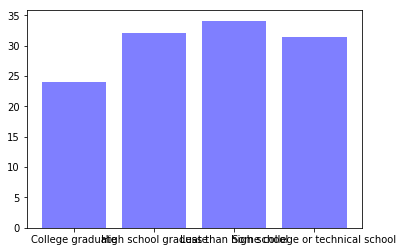

In [119]:
#create a bar plot of education level vs obesity for all states.
plt.bar(x_edu, y_obesity, color='b', alpha=0.5, align="center")
plt.figure(figsize=(10,8))

plt.show()

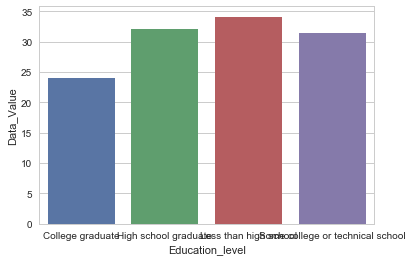

In [120]:
#Plot Education level vs obesity at the national level

sns.set(style="whitegrid")
sns.barplot(x_edu, y_obesity)


In [114]:
rfss_edudf_2016_groupedu.head()

,index,YearStart,YearEnd,LocationAbbr,Class,Topic,Question,QuestionID,Data_Value_Unit,Data_Value_Type,...,Data_Value_Alt,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1,StratificationCategoryId1,GeoLocation
0,48775,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,34.7,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school,EDU,NaN
1,48776,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,34.2,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,EDU,NaN
2,48777,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,35.1,NaN,Some college or technical school,NaN,NaN,NaN,Education,Some college or technical school,EDU,NaN
3,48778,2016,2016,US,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,36.8,NaN,College graduate,NaN,NaN,NaN,Education,College graduate,EDU,NaN
4,48802,2016,2016,AR,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,28.4,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school,EDU,"(34.74865012400045, -92.27449074299966)"
5,48803,2016,2016,AR,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,33.7,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,EDU,"(34.74865012400045, -92.27449074299966)"
6,48804,2016,2016,AR,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,32.1,NaN,Some college or technical school,NaN,NaN,NaN,Education,Some college or technical school,EDU,"(34.74865012400045, -92.27449074299966)"
7,48805,2016,2016,AR,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,34.2,NaN,College graduate,NaN,NaN,NaN,Education,College graduate,EDU,"(34.74865012400045, -92.27449074299966)"
8,48884,2016,2016,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,28.6,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school,EDU,"(32.84057112200048, -86.63186076199969)"
9,48885,2016,2016,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,NaN,Value,...,33.9,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate,EDU,"(32.84057112200048, -86.63186076199969)"


In [122]:
#Create data for obesity  by states 
#Grouby by the education stratification details - Less than high school, High school graduate, Some college or technical school
#College graduate.

rfss_edudf_2016_groupstedu = rfss_edudf_2016.groupby(["LocationAbbr","Stratification1"])
rfss_edudf_2016_groupstedu_avgbystate= rfss_edudf_2016_groupstedu.mean()
rfss_edudf_2016_groupstedu_avgbystate

YearStart  YearEnd  \
LocationAbbr Stratification1                                        
AK           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
AL           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
AR           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
AZ           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
CA           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
CO           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
CT           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
DC           College graduate                       2016     2016   
             High school graduate                   2016     2016   
...                                                  ...      ...   
UT           Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
VA           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
VI           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
VT           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
WA           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
WI           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school       2016     2016   
WV           College graduate                       2016     2016   
             High school graduate                   2016     2016   
             Less than high school                  2016     2016   
             Some college or technical school